## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "humphreyIdealCycle",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Gas Power Cycles",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "topic": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 9,
        "title": "Gas Power Cycles",
        "sections": [
            "Brayton Cycle: the Ideal Cycle for Gas-Turbine Engines"
        ]
    },
    "notes": "."
}

## 1. Problem Statement

The ideal Humphrey cycle uses air as the working fluid, assumed to be an ideal gas, and consists of the following steps:
* reversible, adiabatic compression of an incoming gas
* constant-volume heat addition
* reversible, adiabatic expansion of the gas; and
* constant-pressure heat rejection

The gas enters the compressor at $T_1=$26.85$^\circ$C and $p_1=$0.1 MPa and exits at $p_2=$ 1 MPa. The compressor operates with an isentropic efficiency of 90%. After constant volume heat addition, the gas is at $T_3=$726.85$^\circ$C where it then enters the turbine. It then exits the turbine at a pressure $p_4=$0.1 MPa. The turbine operates with an isentropic effiency of 100%.

**Goal:** Determine:
- How much heat is transferred in per mass, $q_\text{in}$?
- What is the net work per mass, $w_\text{net}$?
- What is the thermal efficiency of this cycle? 

## 2. Schematic 

Draw a schematic that shows a compressor, connected to a detonation chamber, connected to a turbine, which is connected to a heat exchanger. Label the inlet and outlet of the compressor as state 1 and 2, respectively. Label the inlet and outlet of the turbine as state 3 and 4, respectively.  

## 3. Assumptions and Approximations
* **Control Volume** (mass crosses the boundary).
* **Properties** We can use `pyCalor` to determine properties. 
* **Ideal Gas Model** (Justification: The gas at these conditions behaves as an ideal gas, $p v = R T$)
* Neglect changes in kinetic and potential energy ($\Delta KE\approx0$, $\Delta PE\approx0$). (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Steady-flow process** ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
* We have a single inlet and outlet ($\dot{m}_\text{in}$ and $\dot{m}_\text{out}$).

### Compressor
Work transferred into the compressor is:
$$\dot{W}_\text{in} = \dot{m} \left(h_\text{2a} - h_1 \right) $$

The isentropic efficiency of a compressor is:

$$\eta_\text{c} = \frac{h_\text{2s} - h_1}{h_\text{2a} - h_1} $$

Rearranging to solve for $h_\text{2a}$:

$$h_\text{2a} = h_1 + \frac{h_\text{2s} - h_1}{\eta_\text{c}} $$

### Detonation Chamber
Because detonation is so rapid, we can treat this heat addition process as an isochoric process.
$$\dot{Q}_\text{out} = \dot{m} \left(u_\text{3} - u_2 \right) $$

### Turbine
$$\dot{W}_\text{out} = \dot{m} \left(h_3 - h_\text{4a} \right) $$

### Heat Exchanger
$$\dot{Q}_\text{out} = \dot{m} \left(h_\text{4a} - h_1 \right) $$

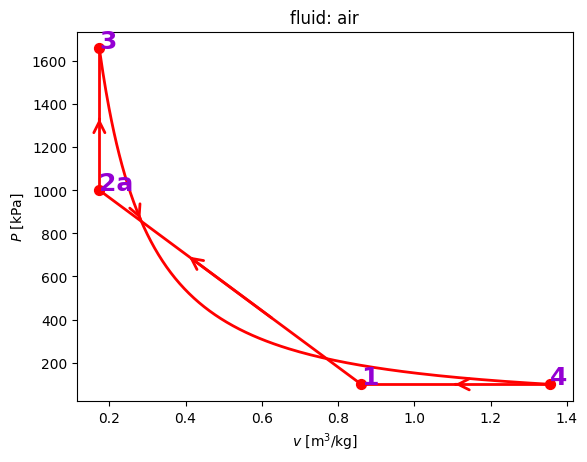

In [18]:
# 5. Properties (Code Cell)
!pip install pyCalor numpy matplotlib

from pyCalor import thermo as th

substance = 'air'

#state 1
T1_C = 26.85
p1_MPa = 0.1
st1 = th.state(substance,T=(T1_C,'C'),p=(p1_MPa,'Mpa'),name='1')

#state 2
p2_MPa = 1
st2s = th.state(substance,s=(st1.s),p=(p2_MPa,'Mpa'),name='2s')
eta_c = 0.9
h2a = st1.h + (st2s.h - st1.h)/eta_c
st2a = th.state(substance,h=(h2a),p=(p2_MPa,'Mpa'),name='2a')

#state 3
T3_C = 726.85
v3_m3PerKg = st2a.v
st3 = th.state(substance,v=(v3_m3PerKg),T=(T3_C,'C'),name='3')

#state 4
p4_MPa = 0.1
st4 = th.state(substance,s=st3.s,p=(p4_MPa,'Mpa'),name='4')

pr = th.process([(st1,st2a),(st2a,st3),(st3,st4),(st4,st1)])
pr.plot("pv");

In [19]:
# 6 Calculations (Code Cell)
wIn_kJperKg = st2a.h - st1.h
qIn_kJperKg = st3.u - st2a.u
wOut_kJperKg = st3.h - st4.h
qOut_kJperKg = st4.h - st1.h
wFlow_kJperKg = wOut_kJperKg - wIn_kJperKg - qIn_kJperKg + qOut_kJperKg

wNet_kJperKg = wOut_kJperKg - wIn_kJperKg - wFlow_kJperKg

eta_th = wNet_kJperKg/qIn_kJperKg

print(f"(a) qIn_kJperKg: {qIn_kJperKg:.2f} kJ/kg")
print(f"(b) wNet_kJperKg: {wNet_kJperKg:.2f} kJ/kg")
print(f"(c) eta_th: {eta_th:.2f} [-]")

(a) qIn_kJperKg: 321.32 kJ/kg
(b) wNet_kJperKg: 146.52 kJ/kg
(c) eta_th: 0.46 [-]


## 7. Summary and Reasoning

The fundamental advantage of the Humphrey cycle over the Brayton cycle is that the heat addition is accompanied by an increase in pressure due to volumetric confinement.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---